In [81]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
df = pd.read_csv('./data/medical_students_dataset.csv', sep=',')
df = df.drop(columns=['Student ID'])
df

,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,NaN,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
2,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,23.0,Female,NaN,46.234173,O,NaN,98.480008,95.0,NaN,231.0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...
199995,24.0,Male,176.503260,95.756997,B,30.737254,99.170685,65.0,121.0,130.0,No,No
199996,29.0,Female,163.917675,45.225194,NaN,16.831734,97.865785,62.0,125.0,198.0,No,Yes
199997,34.0,Female,NaN,99.648914,NaN,33.189303,98.768210,60.0,90.0,154.0,NaN,No
199998,30.0,Female,156.446944,50.142824,A,20.486823,98.994212,61.0,106.0,225.0,No,No


In [83]:
# identify numeric and categorical columns
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
categorical_columns = df.select_dtypes(exclude=np.number).columns.tolist()
print(numeric_columns)
print(categorical_columns)

['Age', 'Height', 'Weight', 'BMI', 'Temperature', 'Heart Rate', 'Blood Pressure', 'Cholesterol']
['Gender', 'Blood Type', 'Diabetes', 'Smoking']


In [84]:
df = df.dropna(subset=['Age', 'Gender'], how='any')
df.shape

(161985, 12)

In [85]:
df.columns

Index(['Age', 'Gender', 'Height', 'Weight', 'Blood Type', 'BMI', 'Temperature',
       'Heart Rate', 'Blood Pressure', 'Cholesterol', 'Diabetes', 'Smoking'],
      dtype='object')

In [86]:
df.isna().sum()

Age                   0
Gender                0
Height            16284
Weight            16137
Blood Type        16154
BMI               16120
Temperature       16187
Heart Rate        16245
Blood Pressure    16147
Cholesterol       16205
Diabetes          16225
Smoking           16197
dtype: int64

In [87]:
df = df.assign(
    Height = lambda row: np.where(
        pd.isnull(row['Height']),
        df.loc[df['Gender'] == row['Gender']]['Height'].mean(),
        row['Height']
    ),
    Weight = lambda row: np.where(
        pd.isnull(row['Weight']),
        df.loc[df['Gender'] == row['Gender']]['Weight'].mean(),
        row['Weight']
    ),
    BMI = lambda row: row['Weight']/((row['Height']/100)**2)
)

<Axes: >

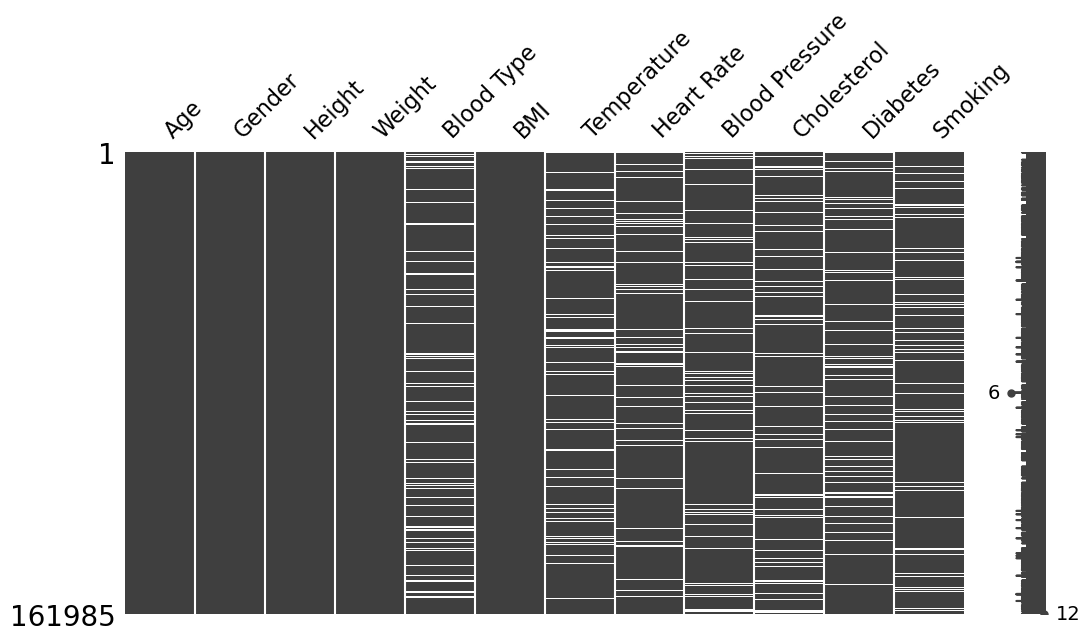

In [88]:
msno.matrix(df, figsize=(12, 6))

In [89]:
print(f'{df.isna().any(axis=1).sum()} rows with missing values.')

84431 rows with missing values.


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 161985 entries, 0 to 199999
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Age             161985 non-null  float64
 1   Gender          161985 non-null  object 
 2   Height          161985 non-null  float64
 3   Weight          161985 non-null  float64
 4   Blood Type      145831 non-null  object 
 5   BMI             161985 non-null  float64
 6   Temperature     145798 non-null  float64
 7   Heart Rate      145740 non-null  float64
 8   Blood Pressure  145838 non-null  float64
 9   Cholesterol     145780 non-null  float64
 10  Diabetes        145760 non-null  object 
 11  Smoking         145788 non-null  object 
dtypes: float64(8), object(4)
memory usage: 16.1+ MB


In [91]:
df.describe(include='object')

,Gender,Blood Type,Diabetes,Smoking
count,161985,145831,145760,145788
unique,2,4,2,2
top,Female,B,No,No
freq,81025,36920,131181,116469


In [92]:
df.describe(include=np.number)

,Age,Height,Weight,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol
count,161985.000000,161985.000000,161985.000000,161985.000000,145798.000000,145740.000000,145838.000000,145780.000000
mean,26.032904,174.934903,69.959719,23.291935,98.601060,79.495286,114.579773,184.506036
std,4.890049,13.707698,16.459005,6.670875,0.500909,11.538594,14.395217,37.549486
min,18.000000,150.000041,40.000718,10.074837,96.397835,60.000000,90.000000,120.000000
25%,22.000000,163.853129,56.571519,18.243895,98.264603,70.000000,102.000000,152.000000
50%,26.000000,174.934903,69.959719,22.816564,98.599508,80.000000,115.000000,184.000000
75%,30.000000,186.069768,83.338052,27.727688,98.941320,89.000000,127.000000,217.000000
max,34.000000,199.998639,99.999907,44.355113,100.824857,99.000000,139.000000,249.000000


In [93]:
# use the numeric columns and fill the missing values with mean
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

In [94]:
print(f'Dropping {df.isna().any(axis=1).sum()} rows with missing values.')
df = df.dropna()
print(f'Shape: {df.shape}')

Dropping 43876 rows with missing values.
Shape: (118109, 12)


In [95]:
print(f'Dropping {df.duplicated().sum()} rows with duplicated values')
df = df.drop_duplicates()
print(f'Shape: {df.shape}')

Dropping 10633 rows with duplicated values
Shape: (107476, 12)


In [96]:
df.isna().sum()

Age               0
Gender            0
Height            0
Weight            0
Blood Type        0
BMI               0
Temperature       0
Heart Rate        0
Blood Pressure    0
Cholesterol       0
Diabetes          0
Smoking           0
dtype: int64

<Axes: >

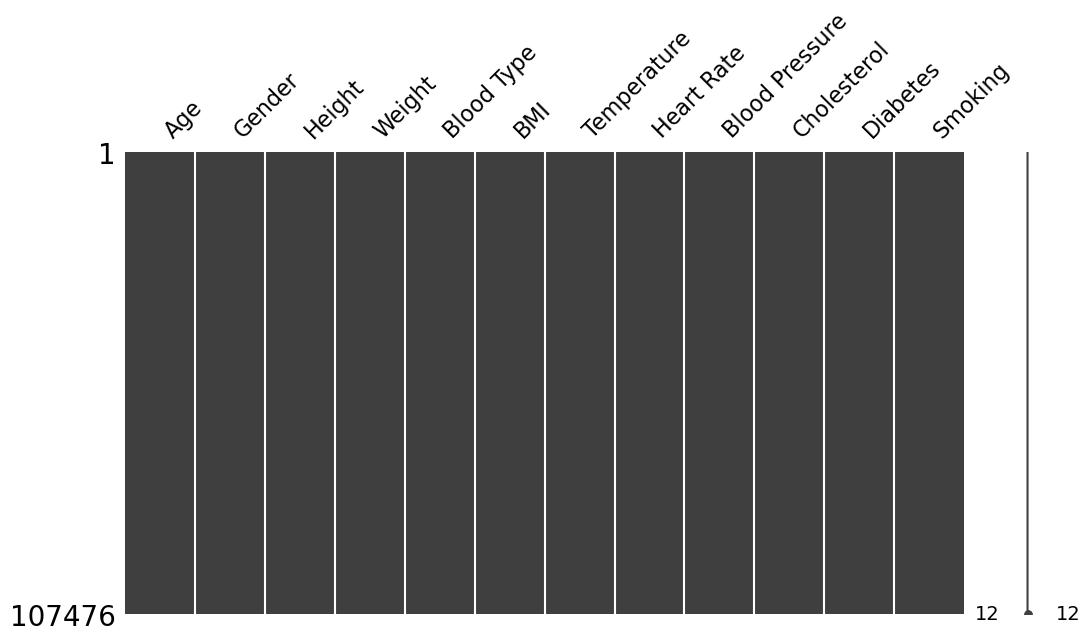

In [97]:
msno.matrix(df, figsize=(12, 6))

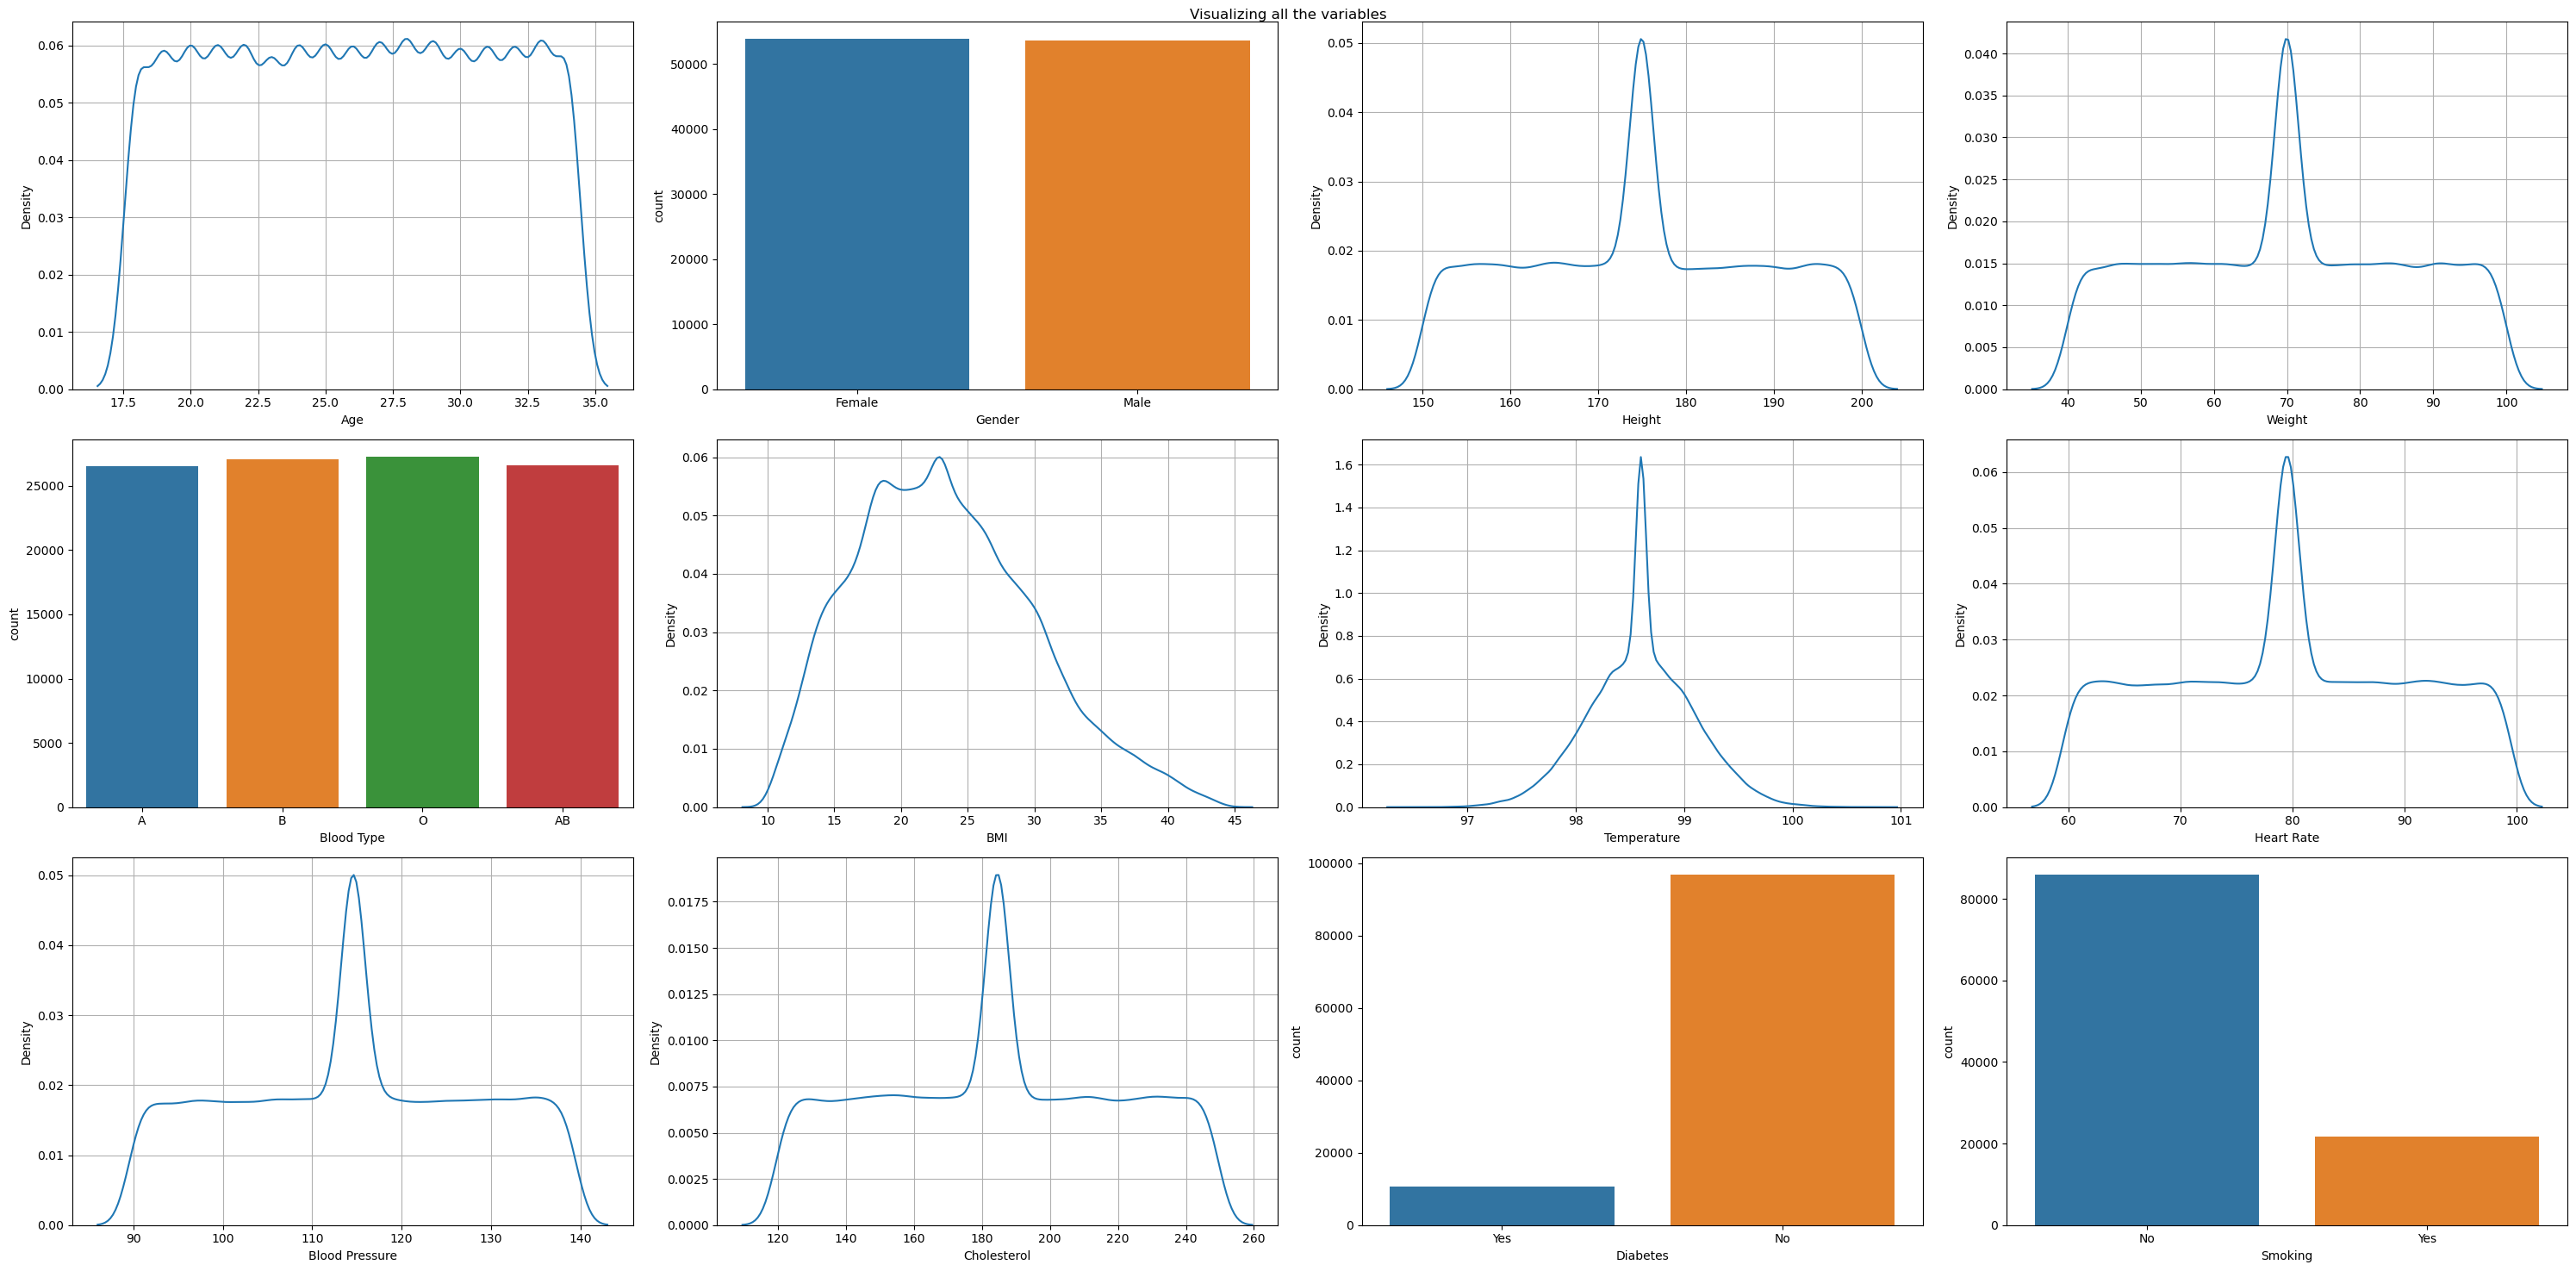

In [98]:
r, c = 3, 4
it = 1
plt.figure(figsize=(30, 15))
plt.suptitle("Visualizing all the variables")
for i, j in list(enumerate(df.columns)):
    plt.subplot(r, c, it)
    if df[j].dtype=='object':
        sns.countplot(x=df[j])
    else:
        sns.kdeplot(df[j])
        plt.grid()
    it += 1
plt.tight_layout()
plt.show()

In [99]:
display(df.head())
df = pd.get_dummies(df, columns=categorical_columns , drop_first=True)
display(df.head())

,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
2,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.000000,130.000000,216.0,Yes,No
3,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.000000,112.000000,141.0,No,Yes
4,23.0,Female,174.934903,46.234173,O,15.108111,98.480008,95.000000,114.579773,231.0,No,No
7,28.0,Male,186.489402,52.389752,AB,15.063921,98.227788,85.000000,123.000000,128.0,No,No
8,21.0,Male,155.039678,42.958703,B,17.871682,98.808053,79.495286,111.000000,243.0,No,No


,Age,Height,Weight,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Gender_Male,Blood Type_AB,Blood Type_B,Blood Type_O,Diabetes_Yes,Smoking_Yes
2,32.0,182.537664,55.741083,16.729017,98.260293,76.000000,130.000000,216.0,0,0,0,0,1,0
3,30.0,182.112867,63.332207,19.096042,98.839605,99.000000,112.000000,141.0,1,0,1,0,0,1
4,23.0,174.934903,46.234173,15.108111,98.480008,95.000000,114.579773,231.0,0,0,0,1,0,0
7,28.0,186.489402,52.389752,15.063921,98.227788,85.000000,123.000000,128.0,1,1,0,0,0,0
8,21.0,155.039678,42.958703,17.871682,98.808053,79.495286,111.000000,243.0,1,0,1,0,0,0


In [103]:
print(f"{df['Diabetes_Yes'].sum()/len(df) * 100}% of the patients have diabetes")
print(f"{df['Smoking_Yes'].sum()/len(df) * 100}% of the patients smoke")

9.982693810711227% of the patients have diabetes
20.107744984926867% of the patients smoke


In [286]:
SEED = 42

In [287]:
target = 'Diabetes_Yes'     # Smoking_Yes
independent_vars = [
    'Age', 'BMI',  'Height', 'Weight',
    'Heart Rate', 'Blood Pressure', 'Cholesterol', # 'Temperature', 
    'Gender_Male', 'Blood Type_AB', 'Blood Type_B', 'Blood Type_O',
    'Smoking_Yes'      # 'Diabetes_Yes',
    ]
X = df[independent_vars] #df.drop(target, axis=1)
y = df[target]

In [288]:
# https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/
from imblearn.over_sampling import RandomOverSampler, SMOTE

oversampler = RandomOverSampler(random_state=SEED)       # SMOTE

X_resampled, y_resampled = oversampler.fit_resample(X, y)
resampled_df = pd.concat([X_resampled, y_resampled], axis=1)

print("Original class distribution:")
print(y.value_counts())

print("\nClass distribution after random oversampling:")
print(y_resampled.value_counts())

Original class distribution:
0    96747
1    10729
Name: Diabetes_Yes, dtype: int64

Class distribution after random oversampling:
1    96747
0    96747
Name: Diabetes_Yes, dtype: int64


In [289]:
from sklearn.model_selection import train_test_split
X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(X, y, test_size=0.2, random_state=SEED, stratify=y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=SEED, stratify=y_resampled)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(154795, 12) (38699, 12) (154795,) (38699,)


In [290]:
print(y_train_original.value_counts()/len(y_train_original))
print(y_test_original.value_counts()/len(y_test_original))

0    0.900174
1    0.099826
Name: Diabetes_Yes, dtype: float64
0    0.900167
1    0.099833
Name: Diabetes_Yes, dtype: float64


# decision tree

In [291]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(criterion='entropy', random_state=SEED) #  min_samples_split=200,
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [292]:
y_test_original.value_counts()

0    19350
1     2146
Name: Diabetes_Yes, dtype: int64

In [293]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report, accuracy_score, roc_auc_score

y_pred = dt_clf.predict(X_test)
y_true = y_test
print("Confusion Matrix : \n" , confusion_matrix(y_true, y_pred))
print("Confusion Matrix proportion : \n" , confusion_matrix(y_true, y_pred, normalize='true'))
print("Accuracy Score :" , accuracy_score(y_true, y_pred))
print("Recall Score :" , recall_score(y_true, y_pred))
print("Precision Score :" , precision_score(y_true, y_pred))
print("F1 Score (Recall fusion Precision) :" , f1_score(y_true, y_pred))
print("ROC AUC Score :" , roc_auc_score(y_true, y_pred))
print("Classification Report : \n" , classification_report(y_true, y_pred))

Confusion Matrix : 
 [[17176  2174]
 [    5 19344]]
Confusion Matrix proportion : 
 [[8.87648579e-01 1.12351421e-01]
 [2.58411287e-04 9.99741589e-01]]
Accuracy Score : 0.9436936354944572
Recall Score : 0.999741588712595
Precision Score : 0.89896830560461
F1 Score (Recall fusion Precision) : 0.9466806959160202
ROC AUC Score : 0.9436950837619822
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.89      0.94     19350
           1       0.90      1.00      0.95     19349

    accuracy                           0.94     38699
   macro avg       0.95      0.94      0.94     38699
weighted avg       0.95      0.94      0.94     38699



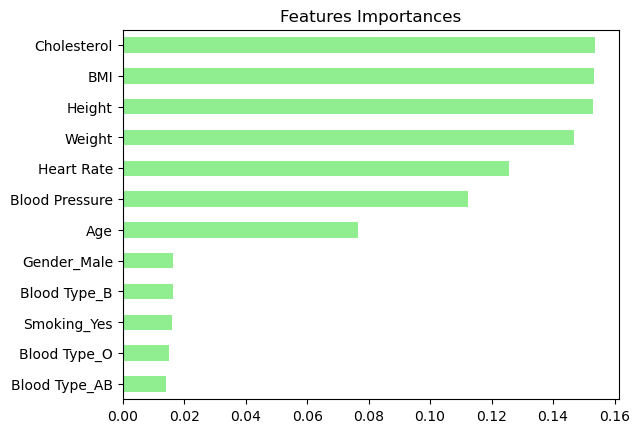

In [294]:
importances = pd.Series(data=dt_clf.feature_importances_, index= X_train_original.columns)
importances_sorted = importances.sort_values()
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

In [295]:
def dectree_max_depth(tree):
    n_nodes = tree.node_count
    children_left = tree.children_left
    children_right = tree.children_right

    def walk(node_id):
        if (children_left[node_id] != children_right[node_id]):
            left_max = 1 + walk(children_left[node_id])
            right_max = 1 + walk(children_right[node_id])
            return max(left_max, right_max)
        else: # leaf
            return 1
    root_node_id = 0
    return walk(root_node_id)

In [296]:
tree = dt_clf.tree_
print(f'depth: {tree.max_depth}')
print(f'number of nodes: {tree.node_count}')
print(f'height: {dectree_max_depth(tree)}')

depth: 59
number of nodes: 24285
height: 60


In [297]:
# sns.pairplot(df[numeric_columns].sample(n=50), kind="kde")

# ensemble learning

In [298]:
def evaluate(model, original=False):
    y_true = y_test
    x_test = X_test
    if original:
        y_true = y_test_original
        x_test = X_test_original
    
    y_pred = model.predict(x_test)  # predict_proba
    print("Confusion Matrix : \n" , confusion_matrix(y_true, y_pred))
    print("Confusion Matrix proportion : \n" , confusion_matrix(y_true, y_pred, normalize='true'))
    print("Precision Score :" , precision_score(y_true, y_pred))
    print("Accuracy Score :" , accuracy_score(y_true, y_pred))
    print("Recall Score :" , recall_score(y_true, y_pred))
    print("F1 Score :" , f1_score(y_true, y_pred))
    print("ROC AUC Score :" , roc_auc_score(y_true, y_pred))
    print("Classification Report : \n" , classification_report(y_true, y_pred))

In [299]:
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier, RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
import xgboost as xgb

classifiers = [
    # ('ada_clf', AdaBoostClassifier(random_state=SEED)),
    # ('gradient_boosting_clf', GradientBoostingClassifier(random_state=SEED)),
    # ('decision_tree_clf', DecisionTreeClassifier(random_state=SEED)),
    ('random_forest_clf', RandomForestClassifier(n_estimators=150, min_samples_split=200, random_state=SEED)),        # (30, 1000) (30, 1500)  (100, 500) (100, 300) (150, 200)
    ('bagging_clf', BaggingClassifier(estimator=DecisionTreeClassifier(min_samples_split=200), n_estimators=5, oob_score=True, random_state=SEED)),
    # ('xgb_classifier_clf', xgb.XGBClassifier(learning_rate=0.02, objective="binary:logistic", random_state=SEED))
]

voting_clf = VotingClassifier(classifiers, voting='soft')       # hard or soft
voting_clf.fit(X_train, y_train)

c:\Users\jeff1\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:789: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
c:\Users\jeff1\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:795: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


VotingClassifier(estimators=[('random_forest_clf',
                              RandomForestClassifier(min_samples_split=200,
                                                     n_estimators=150,
                                                     random_state=42)),
                             ('bagging_clf',
                              BaggingClassifier(estimator=DecisionTreeClassifier(min_samples_split=200),
                                                n_estimators=5, oob_score=True,
                                                random_state=42))],
                 voting='soft')

In [300]:
evaluate(voting_clf)        # data con imputaciones

Confusion Matrix : 
 [[16217  3133]
 [ 3000 16349]]
Confusion Matrix proportion : 
 [[0.83808786 0.16191214]
 [0.15504677 0.84495323]]
Precision Score : 0.839184888615132
Accuracy Score : 0.8415204527248766
Recall Score : 0.8449532275569797
F1 Score : 0.8420591795215163
ROC AUC Score : 0.8415205414270687
Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.84      0.84     19350
           1       0.84      0.84      0.84     19349

    accuracy                           0.84     38699
   macro avg       0.84      0.84      0.84     38699
weighted avg       0.84      0.84      0.84     38699



In [301]:
evaluate(voting_clf, original=True)     # data original

Confusion Matrix : 
 [[16217  3133]
 [  331  1815]]
Confusion Matrix proportion : 
 [[0.83808786 0.16191214]
 [0.15424045 0.84575955]]
Precision Score : 0.3668148746968472
Accuracy Score : 0.8388537402307406
Recall Score : 0.8457595526561044
F1 Score : 0.511700028192839
ROC AUC Score : 0.8419237039766309
Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.84      0.90     19350
           1       0.37      0.85      0.51      2146

    accuracy                           0.84     21496
   macro avg       0.67      0.84      0.71     21496
weighted avg       0.92      0.84      0.86     21496



Metrics for random_forest_clf:
RandomForestClassifier(min_samples_split=200, n_estimators=150, random_state=42)
Confusion Matrix : 
 [[17601  1749]
 [ 2315 17034]]
Confusion Matrix proportion : 
 [[0.9096124  0.0903876 ]
 [0.11964443 0.88035557]]
Precision Score : 0.9068838843635202
Accuracy Score : 0.8949843665210987
Recall Score : 0.8803555739314693
F1 Score : 0.8934228469526906
ROC AUC Score : 0.8949839885161222
Classification Report : 
               precision    recall  f1-score   support

           0       0.88      0.91      0.90     19350
           1       0.91      0.88      0.89     19349

    accuracy                           0.89     38699
   macro avg       0.90      0.89      0.89     38699
weighted avg       0.90      0.89      0.89     38699



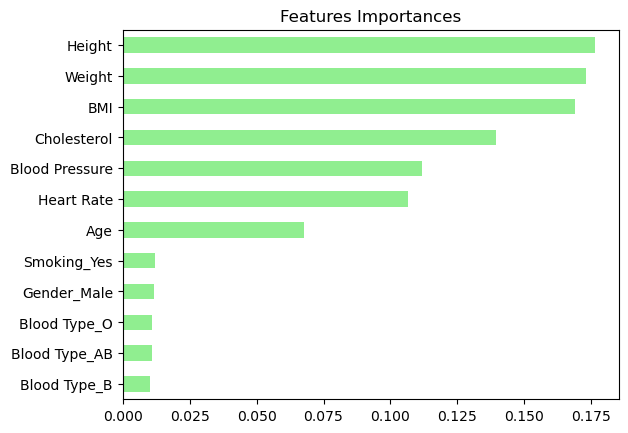

Metrics for bagging_clf:
BaggingClassifier(estimator=DecisionTreeClassifier(min_samples_split=200),
                  n_estimators=5, oob_score=True, random_state=42)
Confusion Matrix : 
 [[14551  4799]
 [ 4161 15188]]
Confusion Matrix proportion : 
 [[0.75198966 0.24801034]
 [0.21504987 0.78495013]]
Precision Score : 0.7598939310551859
Accuracy Score : 0.7684694694953358
Recall Score : 0.7849501266215309
F1 Score : 0.7722188326215172
ROC AUC Score : 0.768469895352109
Classification Report : 
               precision    recall  f1-score   support

           0       0.78      0.75      0.76     19350
           1       0.76      0.78      0.77     19349

    accuracy                           0.77     38699
   macro avg       0.77      0.77      0.77     38699
weighted avg       0.77      0.77      0.77     38699



In [302]:
for clf_name, clf in voting_clf.named_estimators_.items():
    print(f"Metrics for {clf_name}:")
    print(clf)
    evaluate(clf)

    try:
        importances = pd.Series(data=clf.feature_importances_, index= X_train.columns)
        importances_sorted = importances.sort_values()
        importances_sorted.plot(kind='barh', color='lightgreen')
        plt.title('Features Importances')
        plt.show()
    except:
        continue

# GridSearchCV

In [305]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, f1_score

# Hyperparameter tuning
clf = RandomForestClassifier()
params_clf = {
    'n_estimators': [75, 150],   # 
    # 'max_features': ['auto', 'sqrt', 'log2'],
    # 'max_depth': [10, 20, 30],
    'min_samples_split': [500, 200],
    # 'min_samples_leaf': [1, 2, 4],
    # 'bootstrap': [True, False],
}

grid_dt = GridSearchCV(estimator=clf,
                       param_grid=params_clf,
                       scoring=make_scorer(f1_score),
                       cv=3,
                       n_jobs=2    # Colab, Kaggle -1
                       )
grid_dt.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=2,
             param_grid={'min_samples_split': [500, 200],
                         'n_estimators': [75, 150]},
             scoring=make_scorer(f1_score))

In [306]:
best_model = grid_dt.best_estimator_
print(best_model)
evaluate(best_model)

RandomForestClassifier(min_samples_split=200, n_estimators=150)
Confusion Matrix : 
 [[17576  1774]
 [ 2243 17106]]
Confusion Matrix proportion : 
 [[0.90832041 0.09167959]
 [0.1159233  0.8840767 ]]
Precision Score : 0.9060381355932203
Accuracy Score : 0.8961988681878085
Recall Score : 0.8840766964701018
F1 Score : 0.894922702660284
ROC AUC Score : 0.8961985549533972
Classification Report : 
               precision    recall  f1-score   support

           0       0.89      0.91      0.90     19350
           1       0.91      0.88      0.89     19349

    accuracy                           0.90     38699
   macro avg       0.90      0.90      0.90     38699
weighted avg       0.90      0.90      0.90     38699



In [318]:
# https://www.datacamp.com/tutorial/introduction-to-shap-values-machine-learning-interpretability
import shap
shap.initjs()
explainer = shap.Explainer(best_model)
shap_values = explainer.shap_values(X_test)

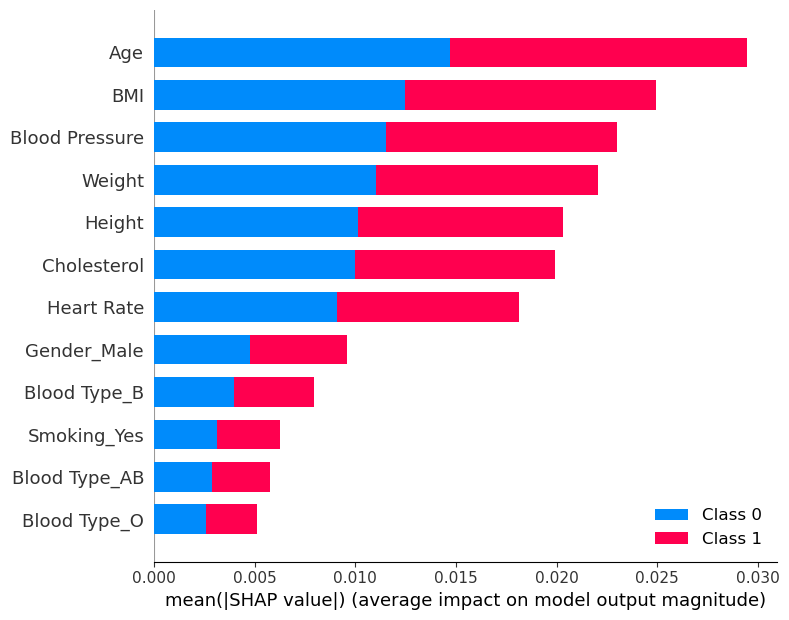

In [319]:
shap.summary_plot(shap_values, X_test)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


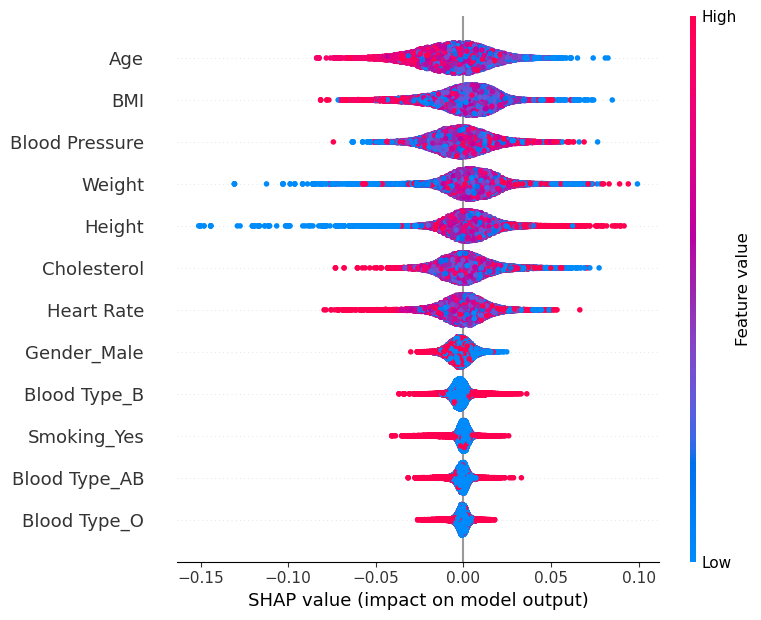

In [320]:
shap.summary_plot(shap_values[0], X_test)

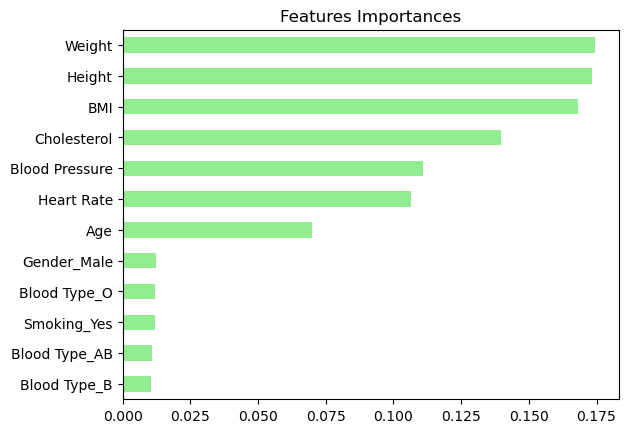

In [321]:
importances = pd.Series(data=best_model.feature_importances_, index= X_train.columns)
importances_sorted = importances.sort_values()
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

# OOB evaluation

In [307]:
bc = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=5, 
    oob_score=True,
    random_state=SEED
    )
bc.fit(X_train, y_train)

c:\Users\jeff1\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:789: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
c:\Users\jeff1\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:795: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=5,
                  oob_score=True, random_state=42)

In [308]:
acc_oob = bc.oob_score_
print('OOB accuracy: {:.3f}'.format(acc_oob))

OOB accuracy: 0.909


In [309]:
evaluate(bc)

Confusion Matrix : 
 [[18464   886]
 [   13 19336]]
Confusion Matrix proportion : 
 [[9.54211886e-01 4.57881137e-02]
 [6.71869347e-04 9.99328131e-01]]
Precision Score : 0.956186331717931
Accuracy Score : 0.9767694255665521
Recall Score : 0.999328130652747
F1 Score : 0.9772813423972101
ROC AUC Score : 0.9767700084788283
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.95      0.98     19350
           1       0.96      1.00      0.98     19349

    accuracy                           0.98     38699
   macro avg       0.98      0.98      0.98     38699
weighted avg       0.98      0.98      0.98     38699



In [310]:
evaluate(bc, original=True)

Confusion Matrix : 
 [[18464   886]
 [    1  2145]]
Confusion Matrix proportion : 
 [[9.54211886e-01 4.57881137e-02]
 [4.65983225e-04 9.99534017e-01]]
Precision Score : 0.7076872319366546
Accuracy Score : 0.9587365091179755
Recall Score : 0.9995340167753961
F1 Score : 0.8286652501448717
ROC AUC Score : 0.9768729515401529
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.95      0.98     19350
           1       0.71      1.00      0.83      2146

    accuracy                           0.96     21496
   macro avg       0.85      0.98      0.90     21496
weighted avg       0.97      0.96      0.96     21496



In [315]:
for clf in bc:
    print(clf)
    # evaluate(clf)

DecisionTreeClassifier(random_state=1952926171)
DecisionTreeClassifier(random_state=1761383086)
DecisionTreeClassifier(random_state=1449071958)
DecisionTreeClassifier(random_state=1910541088)
DecisionTreeClassifier(random_state=1341730541)
